In [1]:
import numpy as np
import torch
from MCMC.BayesQuantile import BQR
import matplotlib.pyplot as plt
from Optimization.CD import SQR
from scipy.linalg import toeplitz

In [2]:
N=500
P=1000
Corr=0.5**toeplitz(np.arange(0,P),np.arange(0,P))
beta=np.zeros((P,1))
beta[0]=3
beta[1]=1.5
beta[4]=2
beta[9]=1
beta[12]=1
beta[18]=0.5
beta[25]=-0.5
beta[30]=2.0
beta[45]=-1.2
beta[50]=-1
Z=np.random.binomial(1,0.8,(N,1))
X=np.random.multivariate_normal(np.zeros(P), Corr, N)
sigma1=1
sigma2=6
Y=X@beta+(Z*sigma1+(1-Z)*sigma2)*np.random.randn(N,1)

In [3]:
device1 = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
# Simulation
beta_sample=BQR(torch.from_numpy(Y).to(device1),torch.from_numpy(X).to(device1),1,1,1,Q=0.5)

100%|██████████| 19999/19999 [00:44<00:00, 452.76it/s]


In [5]:
# Optimization
beta_estimator,beta_path=SQR(torch.from_numpy(Y).to(device1),torch.from_numpy(X).to(device1),Q=0.5,C=0.5,s=1,path=True)

In [6]:
beta_mean=beta_sample.mean(axis=1)

In [7]:
beta_mean

tensor([ 3.0226e+00,  1.4878e+00,  1.1421e-02,  7.0438e-03,  1.8362e+00,
         2.0003e-03,  4.0900e-03, -7.0074e-03, -8.0661e-03,  9.3429e-01,
         5.0882e-03,  6.5451e-03,  9.4974e-01,  2.6767e-02,  3.5376e-03,
        -3.7513e-03, -1.0900e-02,  9.9106e-03,  3.9990e-01, -9.4726e-05,
        -9.6136e-04,  1.8278e-02, -3.1473e-04,  1.2977e-03, -1.1091e-02,
        -3.2165e-01, -1.7581e-03,  4.3255e-03,  2.6567e-02,  1.5123e-02,
         1.9482e+00, -5.8668e-03, -2.5486e-04,  4.3206e-03, -3.5834e-03,
        -1.0423e-02, -3.7627e-03, -1.0336e-02, -5.4984e-03,  3.3586e-03,
         1.7044e-02, -4.1592e-03, -4.9225e-03,  1.4843e-04, -9.8770e-03,
        -1.1204e+00, -3.6592e-04, -2.0544e-03,  4.9198e-04, -2.8944e-02,
        -9.8703e-01, -6.7723e-03, -4.9380e-04, -4.4295e-04,  2.1540e-03,
         2.1382e-02, -5.9230e-03, -7.2456e-03,  2.7047e-03, -7.3573e-03,
        -8.9433e-03, -1.9812e-03, -1.4407e-03, -2.9165e-04, -7.9790e-04,
        -4.1750e-03, -2.7124e-03,  2.8838e-03, -7.5

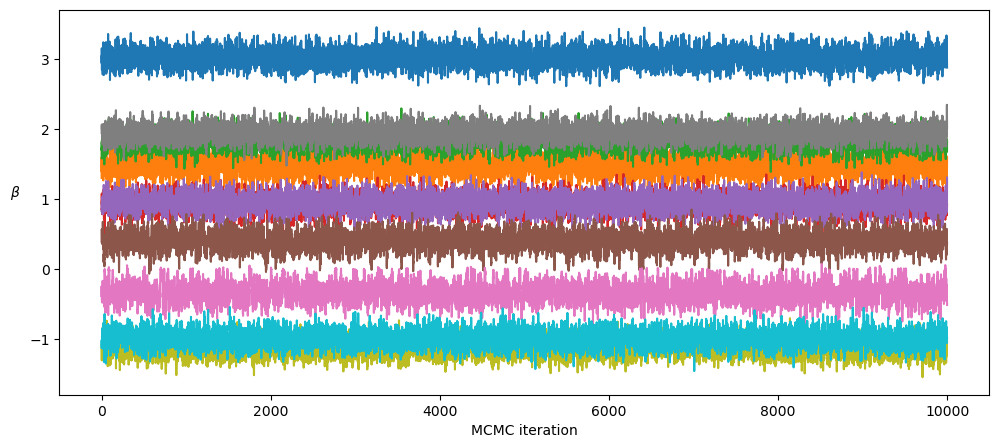

In [8]:
plt.figure(figsize=(12, 5))
plt.rcParams['font.size'] = 10

plt.plot(beta_sample[[0, 1, 4, 9,12,18,25,30,45,50], :].cpu().numpy().T)
plt.xlabel('MCMC iteration')
plt.ylabel(r'$\beta$', rotation=0, labelpad=10)
plt.show()

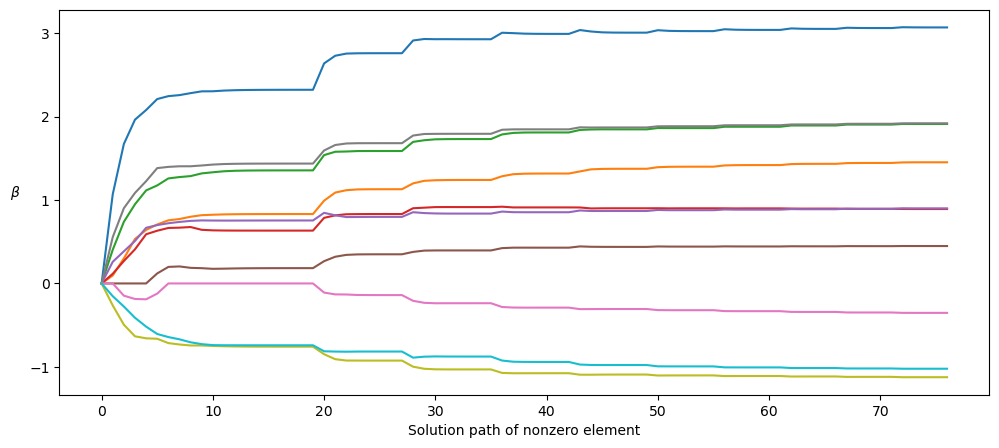

In [9]:
plt.figure(figsize=(12, 5))
plt.rcParams['font.size'] = 10

plt.plot(beta_path[:,[0, 1, 4, 9,12,18,25,30,45,50]])
plt.xlabel('Solution path of nonzero element')
plt.ylabel(r'$\beta$', rotation=0, labelpad=10)
plt.show()